In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'combined_file.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

In [4]:
print(df.head())

       File Name  Total Faces  Curved Faces  Total Edges  Vertices  \
0  00000000.step            3             3           12        24   
1  00000001.step           69            52          328       656   
2  00000002.step           44            39          151       302   
3  00000003.step           25            18           94       188   
4  00000004.step           48            32          232       464   

   Bounding Box Volume  Mean Curvature  Curvature Std Dev        Volume  \
0         27195.122435       -0.065194           0.030954  13464.532030   
1        368060.028935       -0.338318           0.418005  12194.216473   
2        301050.143534       -0.298394           0.541359  87839.781343   
3         11354.057072       -0.155417           0.144685   2118.936448   
4        126056.140931       -0.173751           0.205380   9318.659509   

   Hole Count        size  Criteria Met  
0           0   51.978516             5  
1          11  705.139648             5  
2 

In [5]:
# Count duplicates in the 'File Name' column
duplicate_count = df['File Name'].duplicated().sum()
print(f"Number of duplicate entries in 'File Name': {duplicate_count}")


Number of duplicate entries in 'File Name': 0


In [6]:
df.describe()

,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,size,Criteria Met
count,8904.000000,8904.000000,8904.000000,8904.000000,8.904000e+03,8743.000000,8743.000000,8.904000e+03,8904.000000,8904.000000,8904.000000
mean,61.801662,29.825809,321.262354,642.524708,2.156334e+298,-0.223989,2.478179,-1.347709e+197,17.356357,652.200547,5.726303
std,217.489676,114.528599,1053.976509,2107.953017,inf,8.573979,112.881458,inf,71.752444,1801.465997,2.331506
min,0.000000,0.000000,1.000000,2.000000,2.275796e-14,-703.839538,0.000000,-8.000000e+200,0.000000,3.457031,1.000000
25%,8.000000,2.000000,30.000000,60.000000,5.463713e+03,-0.127091,0.021626,1.737965e+03,1.000000,39.405518,4.000000
50%,19.000000,7.000000,96.000000,192.000000,4.503221e+04,-0.051366,0.076986,1.276031e+04,4.000000,120.133301,6.000000
75%,50.000000,22.000000,264.000000,528.000000,3.753729e+05,-0.011905,0.168639,1.005952e+05,14.000000,425.972656,8.000000
max,9270.000000,5212.000000,32732.000000,65464.000000,8.000000e+300,148.819889,7038.998038,3.167794e+168,2584.000000,19702.682617,10.000000


In [7]:
# Define criteria function to count how many criteria are met
def criteria_count(row):
    criteria = [
        1 <= row["Total Faces"] <= 150,
        2 <= row["Curved Faces"] <= 50,
        1 <= row["Total Edges"] <= 1500,
        1 <= row["Vertices"] <= 2500,
        row["Bounding Box Volume"] < 0.2e6,
        0 > row["Mean Curvature"] >= -0.15,
        0 < row["Curvature Std Dev"] <= 0.2,
        1e5 <= row["Volume"] < 0.13e6,
        5 <= row["Hole Count"] < 50
    ]
    return sum(criteria)  # Count how many criteria are True

# Load the file into a pandas DataFrame
try:
    # Replace 'file_path' with the path to your data file
    data = pd.read_csv(file_path)  # Adjust if file is not CSV (e.g., pd.read_excel for Excel files)
    
    # Add a column to count how many criteria are met for each row
    data['Criteria Met'] = data.apply(criteria_count, axis=1)
    
    # Filter rows meeting at least 6 criteria
    filtered_data = data[data['Criteria Met'] > 7]
    
    # Check if any rows meet the criteria and print their 'File Name'
    if not filtered_data.empty:
        print(f"Rows meeting at least 8 criteria:")
        print(filtered_data[['File Name', 'Criteria Met']])  # Adjust column names if different
    else:
        print(f"No rows in the file '{file_path}' meet at least 6 criteria.")

except Exception as e:
    print(f"Error processing the file: {e}")


Rows meeting at least 8 criteria:
          File Name  Criteria Met
29    00000029.step             8
36    00000036.step             8
56    00000058.step             8
58    00000060.step             8
60    00000062.step             8
...             ...           ...
8863  00009956.step             8
8868  00009961.step             8
8871  00009964.step             8
8897  00009993.step             8
8898  00009994.step             8

[1510 rows x 2 columns]


In [8]:
filtered_data.describe()

,Total Faces,Curved Faces,Total Edges,Vertices,Bounding Box Volume,Mean Curvature,Curvature Std Dev,Volume,Hole Count,size,Criteria Met
count,1510.000000,1510.000000,1510.000000,1510.000000,1.510000e+03,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000,1510.000000
mean,36.716556,15.458940,194.299338,388.598675,9.637689e+04,-0.068950,0.095766,23587.725111,12.480132,337.970161,8.016556
std,24.758966,10.445255,142.411943,284.823886,7.111530e+05,0.036422,0.044119,31156.695203,8.233138,1241.372066,0.127644
min,4.000000,2.000000,12.000000,24.000000,9.922520e+01,-0.269231,0.002224,22.678901,1.000000,8.509766,8.000000
25%,18.000000,8.000000,88.250000,176.500000,1.106851e+04,-0.096903,0.062877,4085.198141,6.000000,52.159424,8.000000
50%,30.000000,12.000000,154.000000,308.000000,3.362211e+04,-0.066205,0.094861,11036.237064,10.000000,100.258789,8.000000
75%,48.000000,20.750000,252.000000,504.000000,9.021429e+04,-0.039787,0.127921,28498.680519,16.000000,204.334717,8.000000
max,146.000000,50.000000,900.000000,1800.000000,2.038856e+07,-0.001022,0.199902,186144.345206,49.000000,19260.953125,9.000000


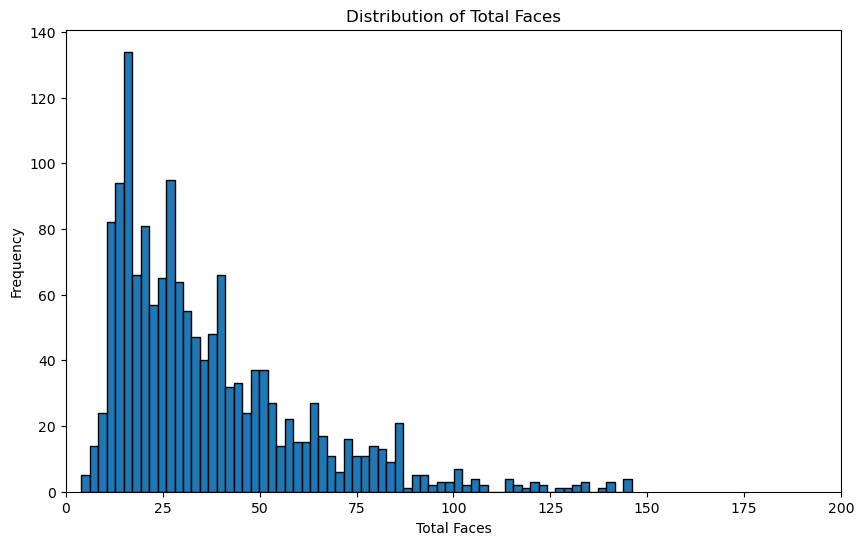

In [9]:
# Plot the histogram for 'Total Faces'
plt.figure(figsize=(10, 6))
filtered_data['Total Faces'].hist(bins=65, edgecolor='black')
plt.xlim(0, 200)  # Set x-axis limits
plt.title('Distribution of Total Faces')
plt.xlabel('Total Faces')
plt.ylabel('Frequency')
plt.grid(False)  # Optional: remove grid lines
plt.show()

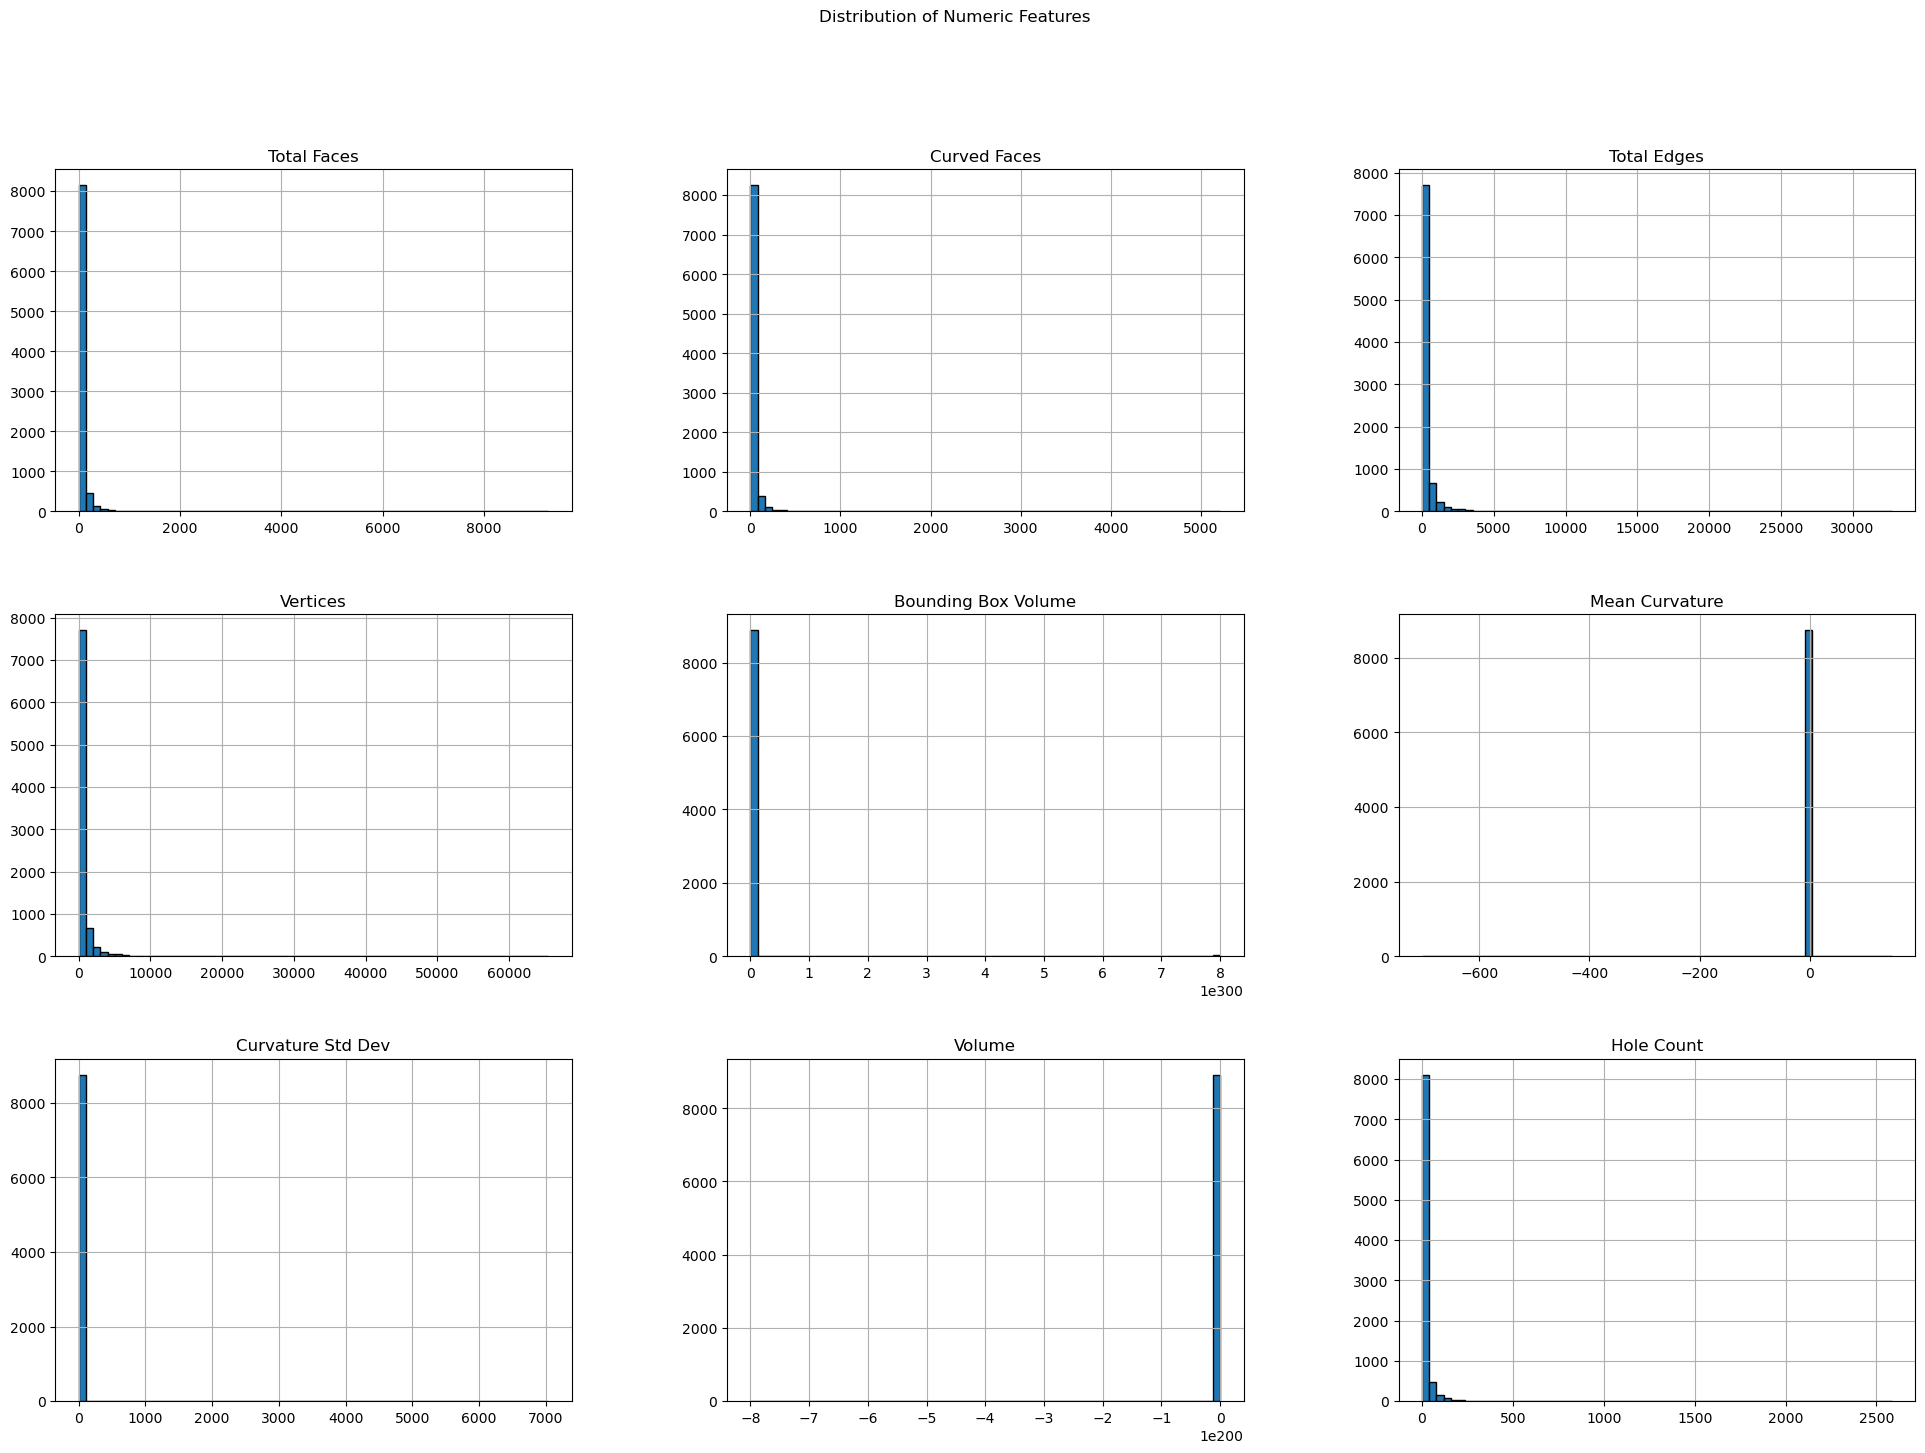

In [10]:
numeric_columns = ['Total Faces', 'Curved Faces', 'Total Edges', 'Vertices', 'Bounding Box Volume', 
                   'Mean Curvature', 'Curvature Std Dev', 'Volume', 'Hole Count']

df[numeric_columns].hist(bins=65, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

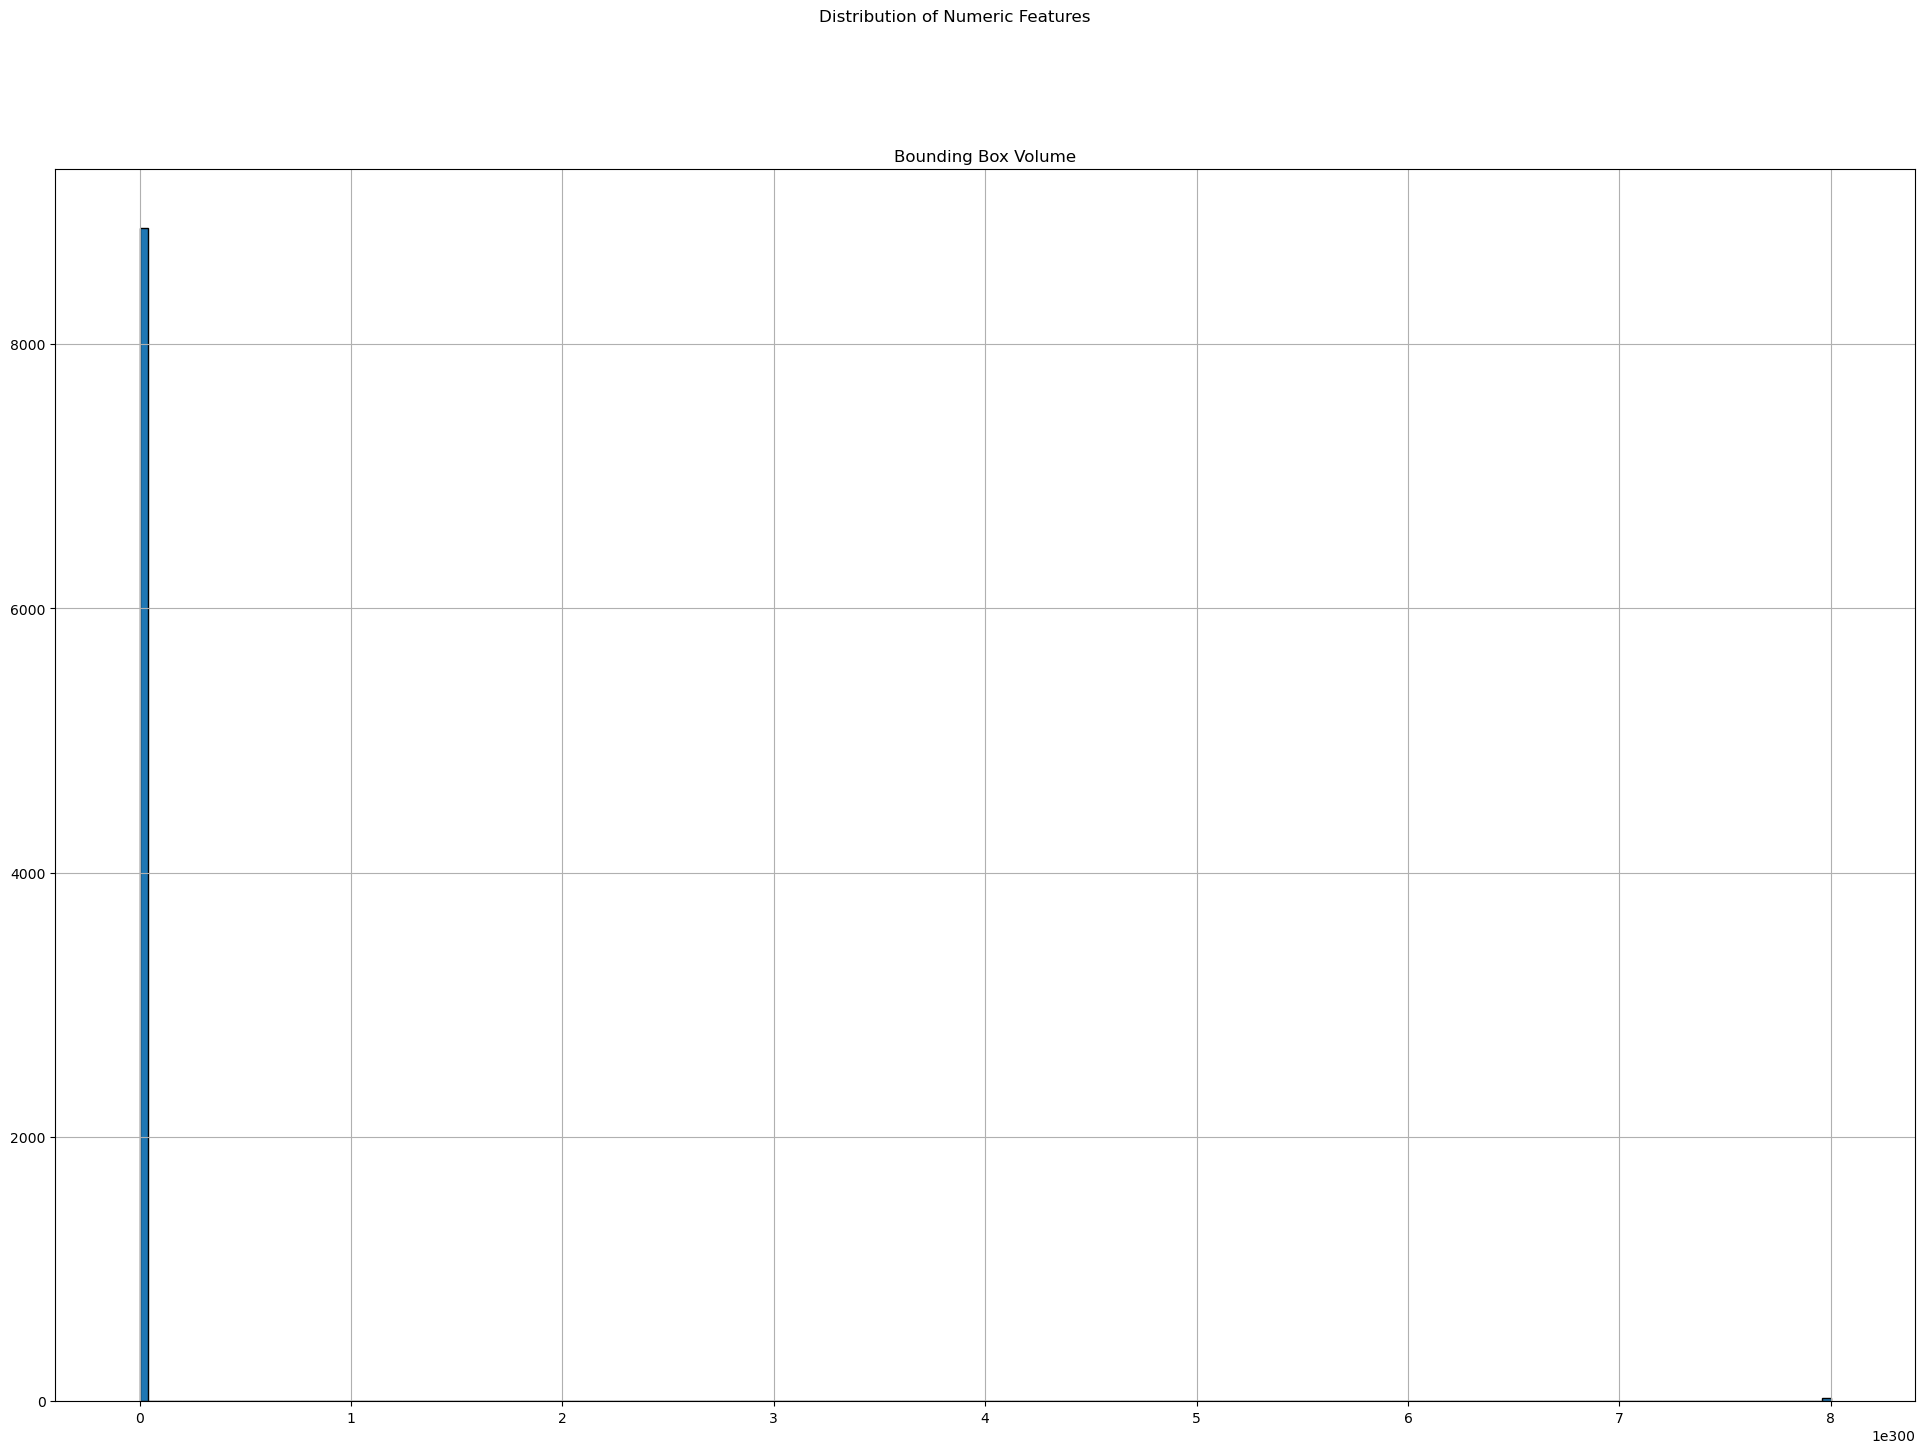

In [11]:
numeric_columns = ['Bounding Box Volume']

df[numeric_columns].hist(bins=200, figsize=(24, 16), edgecolor='black')
plt.suptitle('Distribution of Numeric Features')
plt.show()

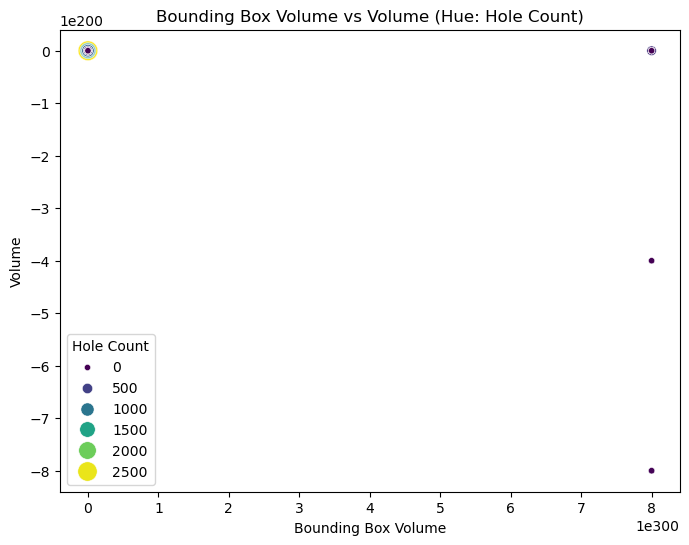

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Bounding Box Volume', y='Volume', data=df, hue='Hole Count', palette='viridis', size='Hole Count', sizes=(20, 200))
plt.title('Bounding Box Volume vs Volume (Hue: Hole Count)')
plt.xlabel('Bounding Box Volume')
plt.ylabel('Volume')
plt.legend(title='Hole Count')
plt.show()

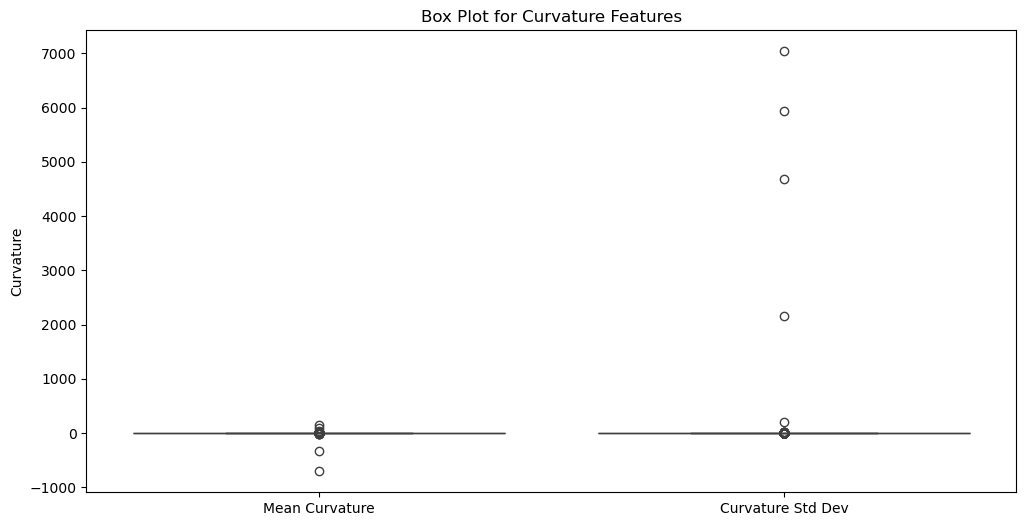

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Mean Curvature', 'Curvature Std Dev']])
plt.title('Box Plot for Curvature Features')
plt.ylabel('Curvature')
plt.show()